In [18]:
import sys

from pathlib import Path
from datetime import timedelta

import dateutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras
import seaborn as sns

In [19]:
np.random.seed(777)

In [20]:
df=pd.read_csv('d_final_mehico.csv')
df.head()

,id,sex,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,...,tobacco,contact_other_covid,covid_res,icu,DEATH,d_ent,d_sym,d_last,diff_days,age_grp
0,167386,1,2,2,54,2,2,2,2,2,...,2,3,1,2,0,2020-04-06,2020-04-01,2020-06-29,89,3.0
1,0b5948,2,2,1,30,2,2,2,2,2,...,2,3,1,2,0,2020-04-17,2020-04-10,2020-06-29,80,2.0
2,0d01b5,1,2,2,60,2,1,2,2,2,...,2,3,1,2,1,2020-04-13,2020-04-13,2020-04-22,9,4.0
3,1beec8,2,2,1,47,2,1,2,2,2,...,2,3,1,1,1,2020-04-16,2020-04-16,2020-04-29,13,3.0
4,1.75E+56,2,2,2,63,2,2,2,2,2,...,2,3,1,2,0,2020-04-22,2020-04-13,2020-06-29,77,4.0


84976

In [17]:
# 데이터 분리 
train_raw = df[['sex', 'intubed','pneumonia','age_grp','pregnancy', 'diabetes', 
                 'copd', 'asthma','inmsupr','hypertension','other_disease',
                 'cardiovascular','obesity', 'renal_chronic', 'tobacco', 
                 'contact_other_covid', 'covid_res', 'icu']].astype(int)


target_raw = df['DEATH']


In [21]:
# 훈련/테스트 세트로 나눈다 -- train_test_split(x,y,사이즈)이용, 8:2로 
x_train, x_test, y_train, y_test = train_test_split(train_raw, target_raw, test_size=0.2)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import mglearn

In [23]:

forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(x_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(x_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(x_test,y_test)))

훈련 세트 정확도 : 0.806
테스트 세트 정확도 : 0.765


특성 중요도 : 
[0.03387607 0.11702657 0.07360151 0.16732256 0.00380831 0.03851552
 0.02721932 0.01685968 0.0260342  0.03836916 0.03256973 0.03052491
 0.04430525 0.02743507 0.03512028 0.11029599 0.14766909 0.02944678]


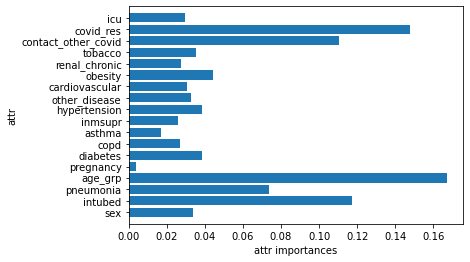

In [30]:
# 특성 중요도

print("특성 중요도 : \n{}".format(forest.feature_importances_))

# 특성 중요도 시각화 하기

def plot_feature_importances_df(model):
    n_features = train_raw.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_raw)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
plt.show()

plot_feature_importances_df(forest)